In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in training data on each potential synapse
data = pd.read_csv("../Data/train_data.csv")

#load in additional features for each neuron
feature_weights = pd.read_csv("../Data/feature_weights.csv")
morph_embeddings = pd.read_csv("../Data/morph_embeddings.csv")

In [2]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

# Principal Component Analysis Stuff

In [4]:
data = (
    data.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185832 entries, 0 to 185831
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null  float64
 12  pre_rf_x        

In [23]:
morph_feature = pd.DataFrame()
morph_feature["pre_nucleus_id"] = data["pre_nucleus_id"]
morph_feature["post_nucleus_id"] = data["post_nucleus_id"]
morph_feature["connected"] = data["connected"]

In [24]:
feature_weights = pd.read_csv("../Data/feature_weights.csv")
morph_embeddings = pd.read_csv("../Data/morph_embeddings.csv")

In [25]:
morph_feature = morph_feature.merge(
    morph_embeddings.rename(columns=lambda x: "pre_" + x),
    how = "left",
    validate = "m:1",
    copy = False 
).merge(
    morph_embeddings.rename(columns=lambda x: "post_" + x),
    how = "left",
    validate = "m:1",
    copy = False 
)

In [26]:
morph_feature

,pre_nucleus_id,post_nucleus_id,connected,pre_morph_emb_0,pre_morph_emb_1,pre_morph_emb_2,pre_morph_emb_3,pre_morph_emb_4,pre_morph_emb_5,pre_morph_emb_6,...,post_morph_emb_22,post_morph_emb_23,post_morph_emb_24,post_morph_emb_25,post_morph_emb_26,post_morph_emb_27,post_morph_emb_28,post_morph_emb_29,post_morph_emb_30,post_morph_emb_31
0,557121,518848,False,0.373316,0.209818,-0.546946,0.630883,0.832248,-0.983688,1.085743,...,-1.064851,-0.816273,-0.215224,-0.598382,0.545335,-0.525224,0.171648,1.022962,-0.645146,-0.687774
1,557121,518848,False,0.373316,0.209818,-0.546946,0.630883,0.832248,-0.983688,1.085743,...,-1.064851,-0.816273,-0.215224,-0.598382,0.545335,-0.525224,0.171648,1.022962,-0.645146,-0.687774
2,557121,518848,False,0.373316,0.209818,-0.546946,0.630883,0.832248,-0.983688,1.085743,...,-1.064851,-0.816273,-0.215224,-0.598382,0.545335,-0.525224,0.171648,1.022962,-0.645146,-0.687774
3,557121,518848,False,0.373316,0.209818,-0.546946,0.630883,0.832248,-0.983688,1.085743,...,-1.064851,-0.816273,-0.215224,-0.598382,0.545335,-0.525224,0.171648,1.022962,-0.645146,-0.687774
4,557121,518848,False,0.373316,0.209818,-0.546946,0.630883,0.832248,-0.983688,1.085743,...,-1.064851,-0.816273,-0.215224,-0.598382,0.545335,-0.525224,0.171648,1.022962,-0.645146,-0.687774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185827,557030,553624,False,-0.043795,0.527537,0.049454,1.310891,0.881195,-1.258964,0.926362,...,-1.274383,-0.828255,-0.038207,-0.499961,0.229395,-0.106602,0.070333,0.822463,-0.726649,-0.849918
185828,557030,553624,False,-0.043795,0.527537,0.049454,1.310891,0.881195,-1.258964,0.926362,...,-1.274383,-0.828255,-0.038207,-0.499961,0.229395,-0.106602,0.070333,0.822463,-0.726649,-0.849918
185829,557030,553624,False,-0.043795,0.527537,0.049454,1.310891,0.881195,-1.258964,0.926362,...,-1.274383,-0.828255,-0.038207,-0.499961,0.229395,-0.106602,0.070333,0.822463,-0.726649,-0.849918
185830,557030,553624,False,-0.043795,0.527537,0.049454,1.310891,0.881195,-1.258964,0.926362,...,-1.274383,-0.828255,-0.038207,-0.499961,0.229395,-0.106602,0.070333,0.822463,-0.726649,-0.849918


In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
X = morph_feature.filter(regex = "post_morph_emb_").to_numpy()

In [35]:
y = morph_feature["connected"].to_numpy()

In [38]:
y.shape

(185832,)

In [37]:
X.shape

(185832, 32)

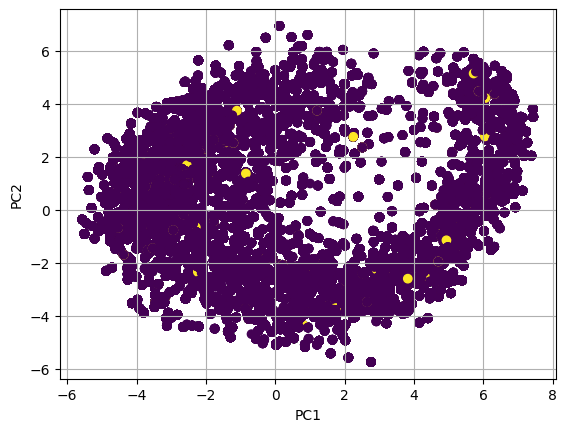

In [51]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X,y)
x_new = pca.transform(X)   

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new[:,0:2], pca.components_) 
plt.show()

In [66]:
pre_morph = pd.DataFrame()

In [ ]:
pre_morph

In [77]:
pre_morph = morph_feature.filter(regex = "pre_morph_emb_")
pre_morph["connected"] = data.apply(lambda row: row.connected, axis = 1)


C:\Users\86185\AppData\Local\Temp\ipykernel_15312\1143383856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_morph["connected"] = data.apply(lambda row: row.connected, axis = 1)


In [81]:
pre_morph = pre_morph.dropna(how = "any", axis = 0).reset_index(drop=True)

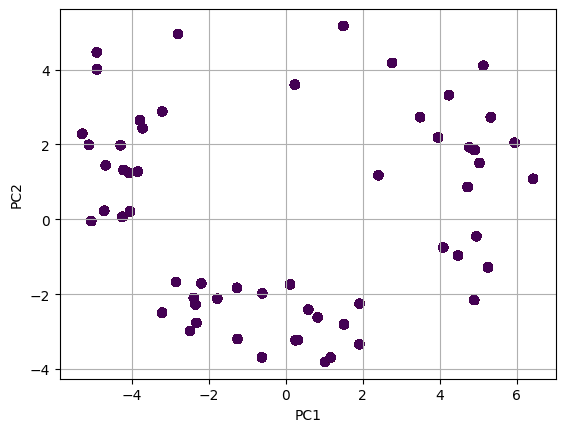

In [85]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X,y)
x_new = pca.transform(X)   

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()




#Call the function. 
myplot(x_new[:,0:2], pca.components_) 
plt.show()

PCA on morph_embeddings not particularly interpretable : should I try FTT?

Performing PCA on training data

In [98]:
data = pd.read_csv("../Data/train_data.csv")

In [100]:
list(data.columns)

['ID',
 'axonal_coor_x',
 'axonal_coor_y',
 'axonal_coor_z',
 'dendritic_coor_x',
 'dendritic_coor_y',
 'dendritic_coor_z',
 'adp_dist',
 'post_skeletal_distance_to_soma',
 'pre_skeletal_distance_to_soma',
 'pre_oracle',
 'pre_test_score',
 'pre_rf_x',
 'pre_rf_y',
 'post_oracle',
 'post_test_score',
 'post_rf_x',
 'post_rf_y',
 'compartment',
 'pre_brain_area',
 'post_brain_area',
 'pre_nucleus_x',
 'pre_nucleus_y',
 'pre_nucleus_z',
 'post_nucleus_x',
 'post_nucleus_y',
 'post_nucleus_z',
 'pre_nucleus_id',
 'post_nucleus_id',
 'connected']

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185832 entries, 0 to 185831
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null  float64
 12  pre_rf_x        

For now, ignoring categorical data rip

In [111]:
X = data[['axonal_coor_x',
 'axonal_coor_y',
 'axonal_coor_z',
 'dendritic_coor_x',
 'dendritic_coor_y',
 'dendritic_coor_z',
 'adp_dist',
 'post_skeletal_distance_to_soma',
 'pre_skeletal_distance_to_soma',
 'pre_oracle',
 'pre_test_score',
 'pre_rf_x',
 'pre_rf_y',
 'post_oracle',
 'post_test_score',
 'post_rf_x',
 'post_rf_y',
 'pre_nucleus_x',
 'pre_nucleus_y',
 'pre_nucleus_z',
 'post_nucleus_x',
 'post_nucleus_y',
 'post_nucleus_z',
 'pre_nucleus_id',
 'post_nucleus_id']].to_numpy()

In [112]:
y = data[["connected"]].to_numpy()

C:\Users\86185\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86185\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86185\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='x1', ylabel='x2'>

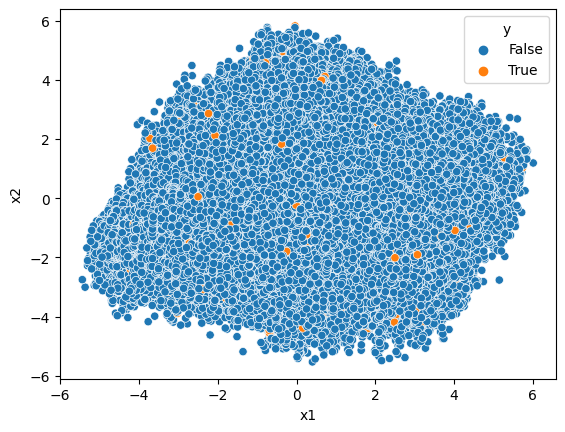

In [131]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X,y)
x_new = pca.transform(X)   

df = pd.DataFrame()

df["x1"] = x_new[:,0]
df["x2"] = x_new[:,1]
df["y"] = y

sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y")

PCA not interpretable on training data either

## Automating PCA 

In [132]:
from sklearn.pipeline import Pipeline

In [135]:
features = [['axonal_coor_x',
 'axonal_coor_y',
 'axonal_coor_z'],
 ['dendritic_coor_x',
 'dendritic_coor_y',
 'dendritic_coor_z'],
 ['post_skeletal_distance_to_soma',
  'post_oracle',
 'post_test_score',
 'post_rf_x',
 'post_rf_y',
 'post_nucleus_x',
 'post_nucleus_y',
 'post_nucleus_z'],
 ['pre_skeletal_distance_to_soma',
 'pre_oracle',
 'pre_test_score',
 'pre_rf_x',
 'pre_rf_y',
 'pre_nucleus_x',
 'pre_nucleus_y',
 'pre_nucleus_z']]

C:\Users\86185\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86185\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86185\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

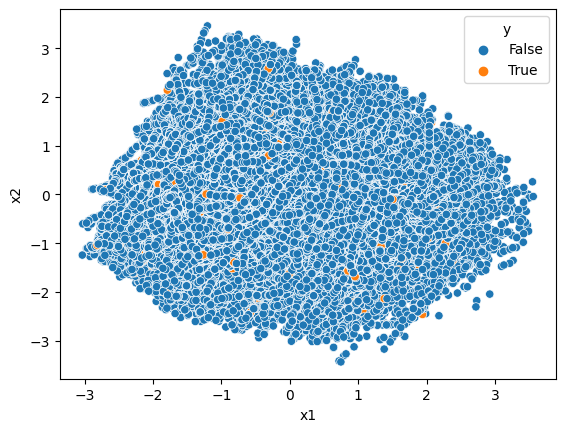

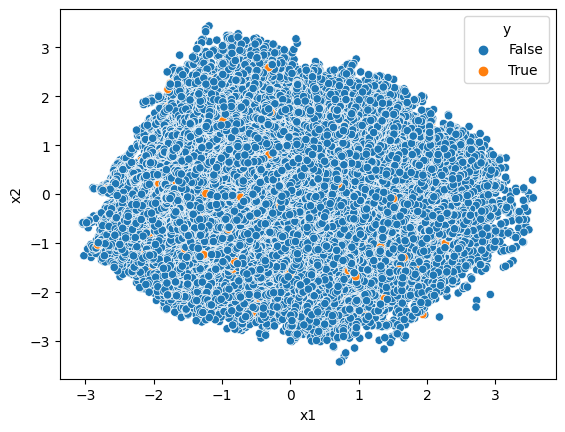

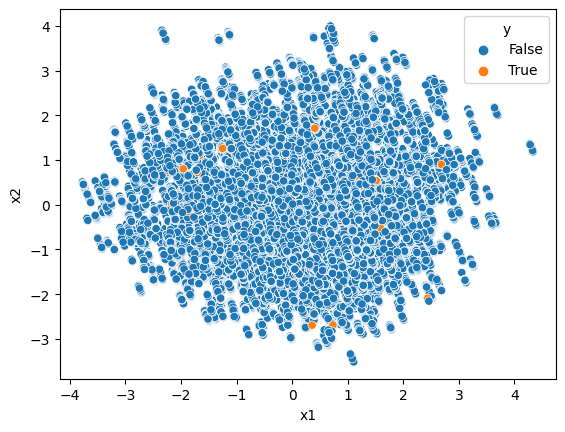

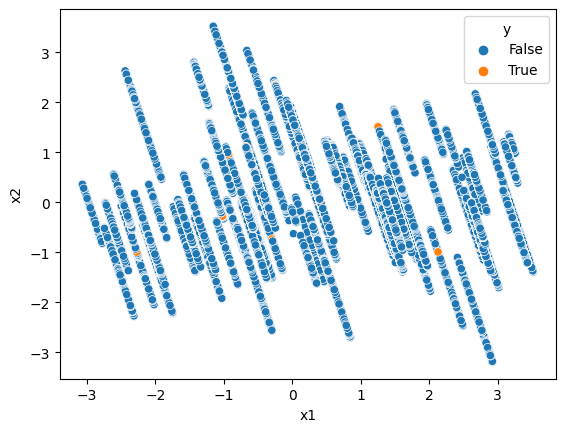

In [137]:

for feature in features:
    X = data[feature].to_numpy()
    y = data["connected"].to_numpy()
    scaler = StandardScaler()
    scaler.fit(X)
    X=scaler.transform(X)

    pca = PCA(n_components=2)
    pca.fit(X,y)
    x_new = pca.transform(X)   

    df = pd.DataFrame()

    df["x1"] = x_new[:,0]
    df["x2"] = x_new[:,1]
    df["y"] = y
    
    plt.figure()
    sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y")



# Axonal Distance: